In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
# code so we can import functions from src folder

import os
import sys

# import python scripts we created to help with feature engineering
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


from src.helpers import identify_number_categories, identify_missing_data
from src.outliers import calc_outliers
from src.feature_importance_plot import feature_importance_plot
from src.learning_curve_plot import learning_curve_plot

In [4]:
# load saved pkl from last notebook

songs_data = pd.read_csv("../data/songs_data.csv")

songs_data.head(n = 10)

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   
5  7fvUMiyapMsRRxr07cU8Ef  Beautiful People (feat. Khalid) - Jack Wins Remix   
6  2OAylPUDDfwRGfe0lYqlCQ                    Never Really Over - R3HAB Remix   
7  6b1RNvAcJjQH73eZO4BLAB           Post Malone (feat. RANI) - GATTÜSO Remix   
8  7bF6tCO3gFb8INrEDcjNT5             Tough Love - Tiësto Remix / Radio Edit   
9  1IXGILkPm0tOCNeq00kCPa                If I Can't Have You - Gryffin Remix   

       track_artist  track_popularity playlist_name             playlist_id  \
0        Ed Sheeran                66     Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
1          Maroon 5                67     Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
2      Zara Larsson                70     Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
3  The Chainsmokers                60     Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
4     Lewis Capaldi                69     Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
5        Ed Sheeran                67     Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
6        Katy Perry                62     Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
7         Sam Feldt                69     Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
8            Avicii                68     Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
9      Shawn Mendes                67     Pop Remix  37i9dQZF1DXcZDD7cfEKhW   

  genre  danceability  energy  key  loudness  mode  speechiness  acousticness  \
0   pop         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1   pop         0.726   0.815   11    -4.969     1       0.0373        0.0724   
2   pop         0.675   0.931    1    -3.432     0       0.0742        0.0794   
3   pop         0.718   0.930    7    -3.778     1       0.1020        0.0287   
4   pop         0.650   0.833    1    -4.672     1       0.0359        0.0803   
5   pop         0.675   0.919    8    -5.385     1       0.1270        0.0799   
6   pop         0.449   0.856    5    -4.788     0       0.0623        0.1870   
7   pop         0.542   0.903    4    -2.419     0       0.0434        0.0335   
8   pop         0.594   0.935    8    -3.562     1       0.0565        0.0249   
9   pop         0.642   0.818    2    -4.552     1       0.0320        0.0567   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000000    0.0653    0.518  122.036       194754  
1          0.004210    0.3570    0.693   99.972       162600  
2          0.000023    0.1100    0.613  124.008       176616  
3          0.000009    0.2040    0.277  121.956       169093  
4          0.000000    0.0833    0.725  123.976       189052  
5          0.000000    0.1430    0.585  124.982       163049  
6          0.000000    0.1760    0.152  112.648       187675  
7          0.000005    0.1110    0.367  127.936       207619  
8          0.000004    0.6370    0.366  127.015       193187  
9          0.000000    0.0919    0.590  124.957       253040

In [5]:
print("# number of rows:", songs_data.shape[0])
print("# number of columns:", songs_data.shape[1])

# number of rows: 32833
# number of columns: 19


In [6]:
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          32833 non-null  object 
 1   track_name        32828 non-null  object 
 2   track_artist      32828 non-null  object 
 3   track_popularity  32833 non-null  int64  
 4   playlist_name     32833 non-null  object 
 5   playlist_id       32833 non-null  object 
 6   genre             32833 non-null  object 
 7   danceability      32833 non-null  float64
 8   energy            32833 non-null  float64
 9   key               32833 non-null  int64  
 10  loudness          32833 non-null  float64
 11  mode              32833 non-null  int64  
 12  speechiness       32833 non-null  float64
 13  acousticness      32833 non-null  float64
 14  instrumentalness  32833 non-null  float64
 15  liveness          32833 non-null  float64
 16  valence           32833 non-null  float6

In [7]:
songs_data.describe()

track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.084747      0.190176      0.510561    120.881132   
std            0.224230      0.154317      0.233146     26.903624   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.960000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32833.000000  
mean   225799.811622  
std     59834.006182  
min      4000.000000  
25%    187819.000000  
50%    216000.000000  
75%    253585.000000  
max    517810.000000

In [8]:
songs_data.std()

/var/folders/8j/7n34843d16760smbwy7x_sxw0000gn/T/ipykernel_811/605326051.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  songs_data.std()


track_popularity       24.984074
danceability            0.145085
energy                  0.180910
key                     3.611657
loudness                2.988436
mode                    0.495671
speechiness             0.101314
acousticness            0.219633
instrumentalness        0.224230
liveness                0.154317
valence                 0.233146
tempo                  26.903624
duration_ms         59834.006182
dtype: float64

In [9]:
# Most popular artists

import plotly.express as px

artistbypop = songs_data.groupby('track_artist').sum().sort_values('track_popularity' ,ascending=False)[:20]
artistbypop=artistbypop.reset_index()
#plot the graph
px.bar(x='track_artist', y='track_popularity', data_frame=artistbypop)

Text(0.5, 1.0, 'Most popular genres')

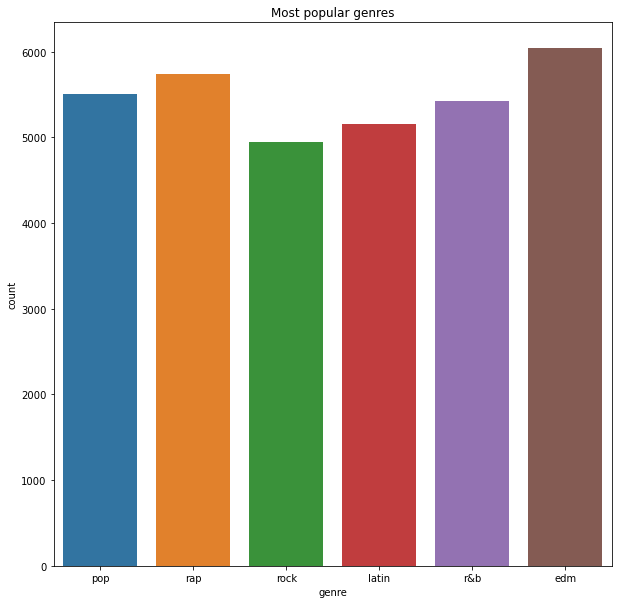

In [10]:
# Most popular Genres

figure = plt.figure(figsize=(10,10))

sns.countplot(x='genre',data=songs_data).set_title('Most popular genres')


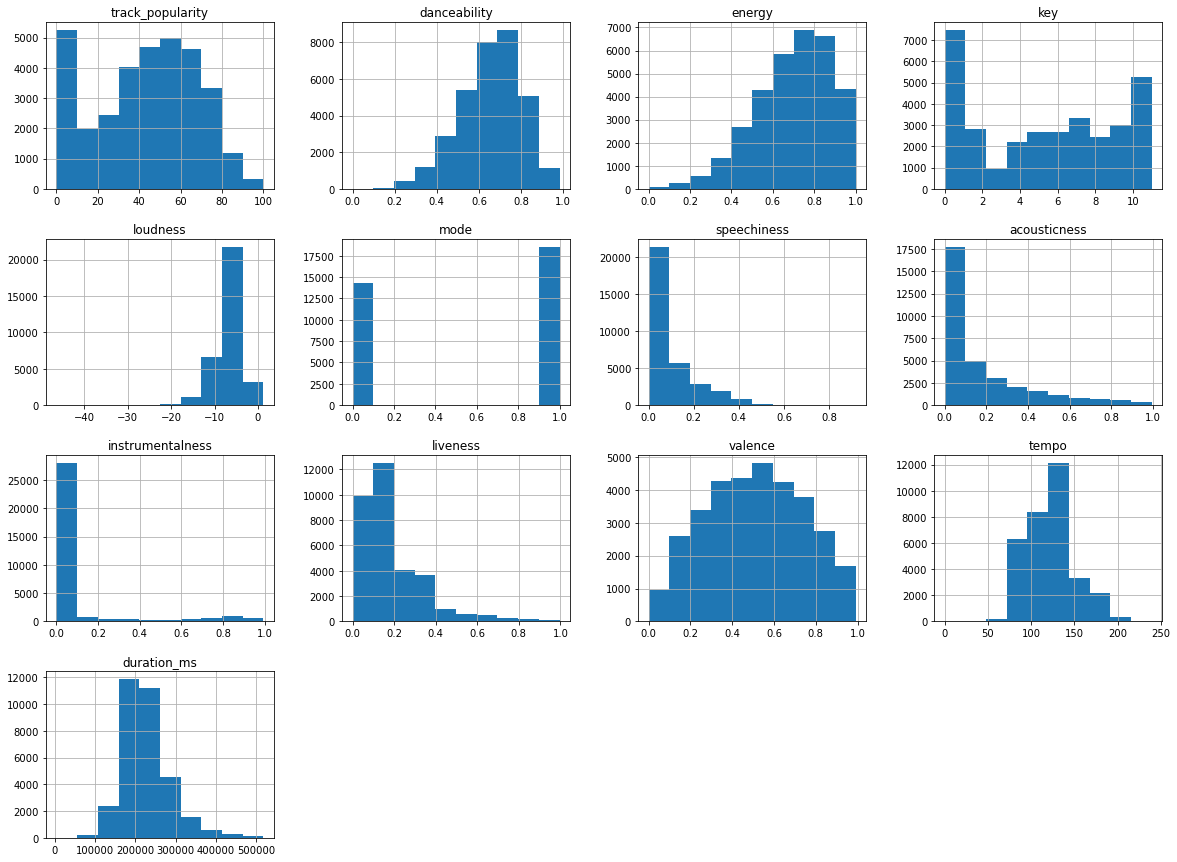

In [11]:
# explore the distribution of numerical data

songs_data.hist(figsize = (20, 15))

plt.show()

In [12]:
# look at correlations between the data (put inside a variable so we can use for plotting)

corr_matrix = songs_data.corr()

corr_matrix

track_popularity  danceability    energy       key  \
track_popularity          1.000000      0.064748 -0.109112 -0.000650   
danceability              0.064748      1.000000 -0.086073  0.011736   
energy                   -0.109112     -0.086073  1.000000  0.010052   
key                      -0.000650      0.011736  0.010052  1.000000   
loudness                  0.057687      0.025335  0.676625  0.000959   
mode                      0.010637     -0.058647 -0.004800 -0.174093   
speechiness               0.006819      0.181721 -0.032150  0.022607   
acousticness              0.085159     -0.024519 -0.539745  0.004306   
instrumentalness         -0.149872     -0.008655  0.033247  0.005968   
liveness                 -0.054584     -0.123859  0.161223  0.002887   
valence                   0.033231      0.330523  0.151103  0.019914   
tempo                    -0.005378     -0.184084  0.149951 -0.013370   
duration_ms              -0.143682     -0.096879  0.012611  0.015139   

                  loudness      mode  speechiness  acousticness  \
track_popularity  0.057687  0.010637     0.006819      0.085159   
danceability      0.025335 -0.058647     0.181721     -0.024519   
energy            0.676625 -0.004800    -0.032150     -0.539745   
key               0.000959 -0.174093     0.022607      0.004306   
loudness          1.000000 -0.019289     0.010339     -0.361638   
mode             -0.019289  1.000000    -0.063512      0.009415   
speechiness       0.010339 -0.063512     1.000000      0.026092   
acousticness     -0.361638  0.009415     0.026092      1.000000   
instrumentalness -0.147824 -0.006741    -0.103424     -0.006850   
liveness          0.077613 -0.005549     0.055426     -0.077243   
valence           0.053384  0.002614     0.064659     -0.016845   
tempo             0.093767  0.014329     0.044603     -0.112724   
duration_ms      -0.115058  0.015634    -0.089431     -0.081581   

                  instrumentalness  liveness   valence     tempo  duration_ms  
track_popularity         -0.149872 -0.054584  0.033231 -0.005378    -0.143682  
danceability             -0.008655 -0.123859  0.330523 -0.184084    -0.096879  
energy                    0.033247  0.161223  0.151103  0.149951     0.012611  
key                       0.005968  0.002887  0.019914 -0.013370     0.015139  
loudness                 -0.147824  0.077613  0.053384  0.093767    -0.115058  
mode                     -0.006741 -0.005549  0.002614  0.014329     0.015634  
speechiness              -0.103424  0.055426  0.064659  0.044603    -0.089431  
acousticness             -0.006850 -0.077243 -0.016845 -0.112724    -0.081581  
instrumentalness          1.000000 -0.005507 -0.175402  0.023335     0.063235  
liveness                 -0.005507  1.000000 -0.020560  0.021018     0.006138  
valence                  -0.175402 -0.020560  1.000000 -0.025732    -0.032225  
tempo                     0.023335  0.021018 -0.025732  1.000000    -0.001412  
duration_ms               0.063235  0.006138 -0.032225 -0.001412     1.000000

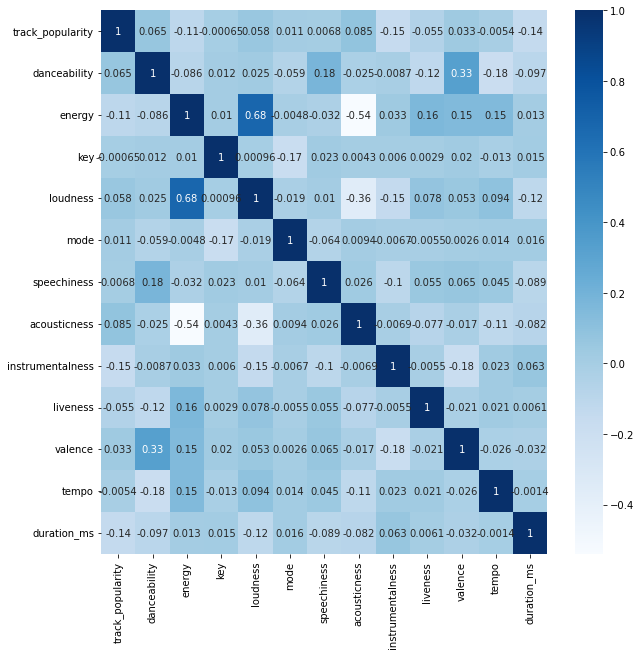

In [13]:
# plot using heatmap

fig = plt.figure(figsize = (10, 10))

sns.heatmap(corr_matrix,
           cmap = 'Blues',
           annot = True)

plt.show()

Text(0, 0.5, 'Loudness')

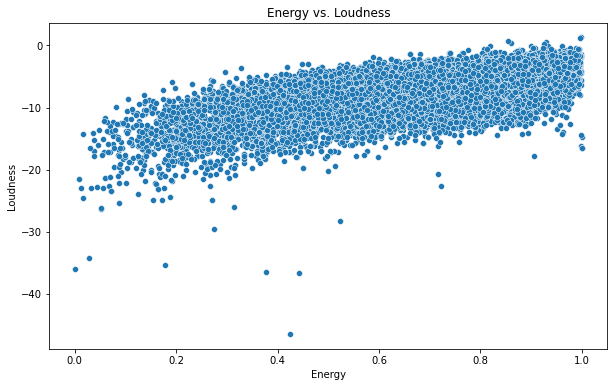

In [14]:
# energy vs loudness

plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=songs_data, x = "energy", y = "loudness")
ax.set_title("Energy vs. Loudness")
ax.set_xlabel("Energy")
ax.set_ylabel("Loudness")

Text(0, 0.5, 'Danceability')

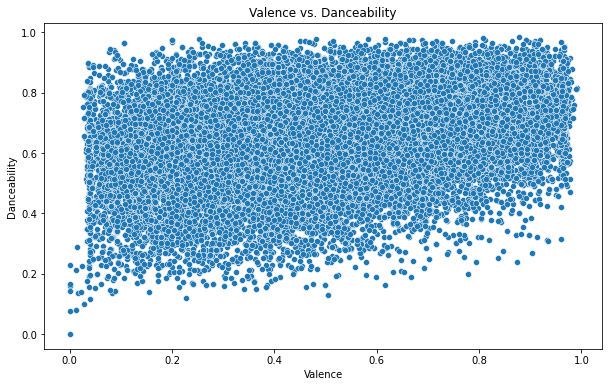

In [15]:
# Valence vs. Danceability

plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=songs_data, x = 'valence', y = 'danceability')
ax.set_title("Valence vs. Danceability")
ax.set_xlabel("Valence")
ax.set_ylabel("Danceability")

There does not seem to be a correlation between the musical valence of a track and the daceability

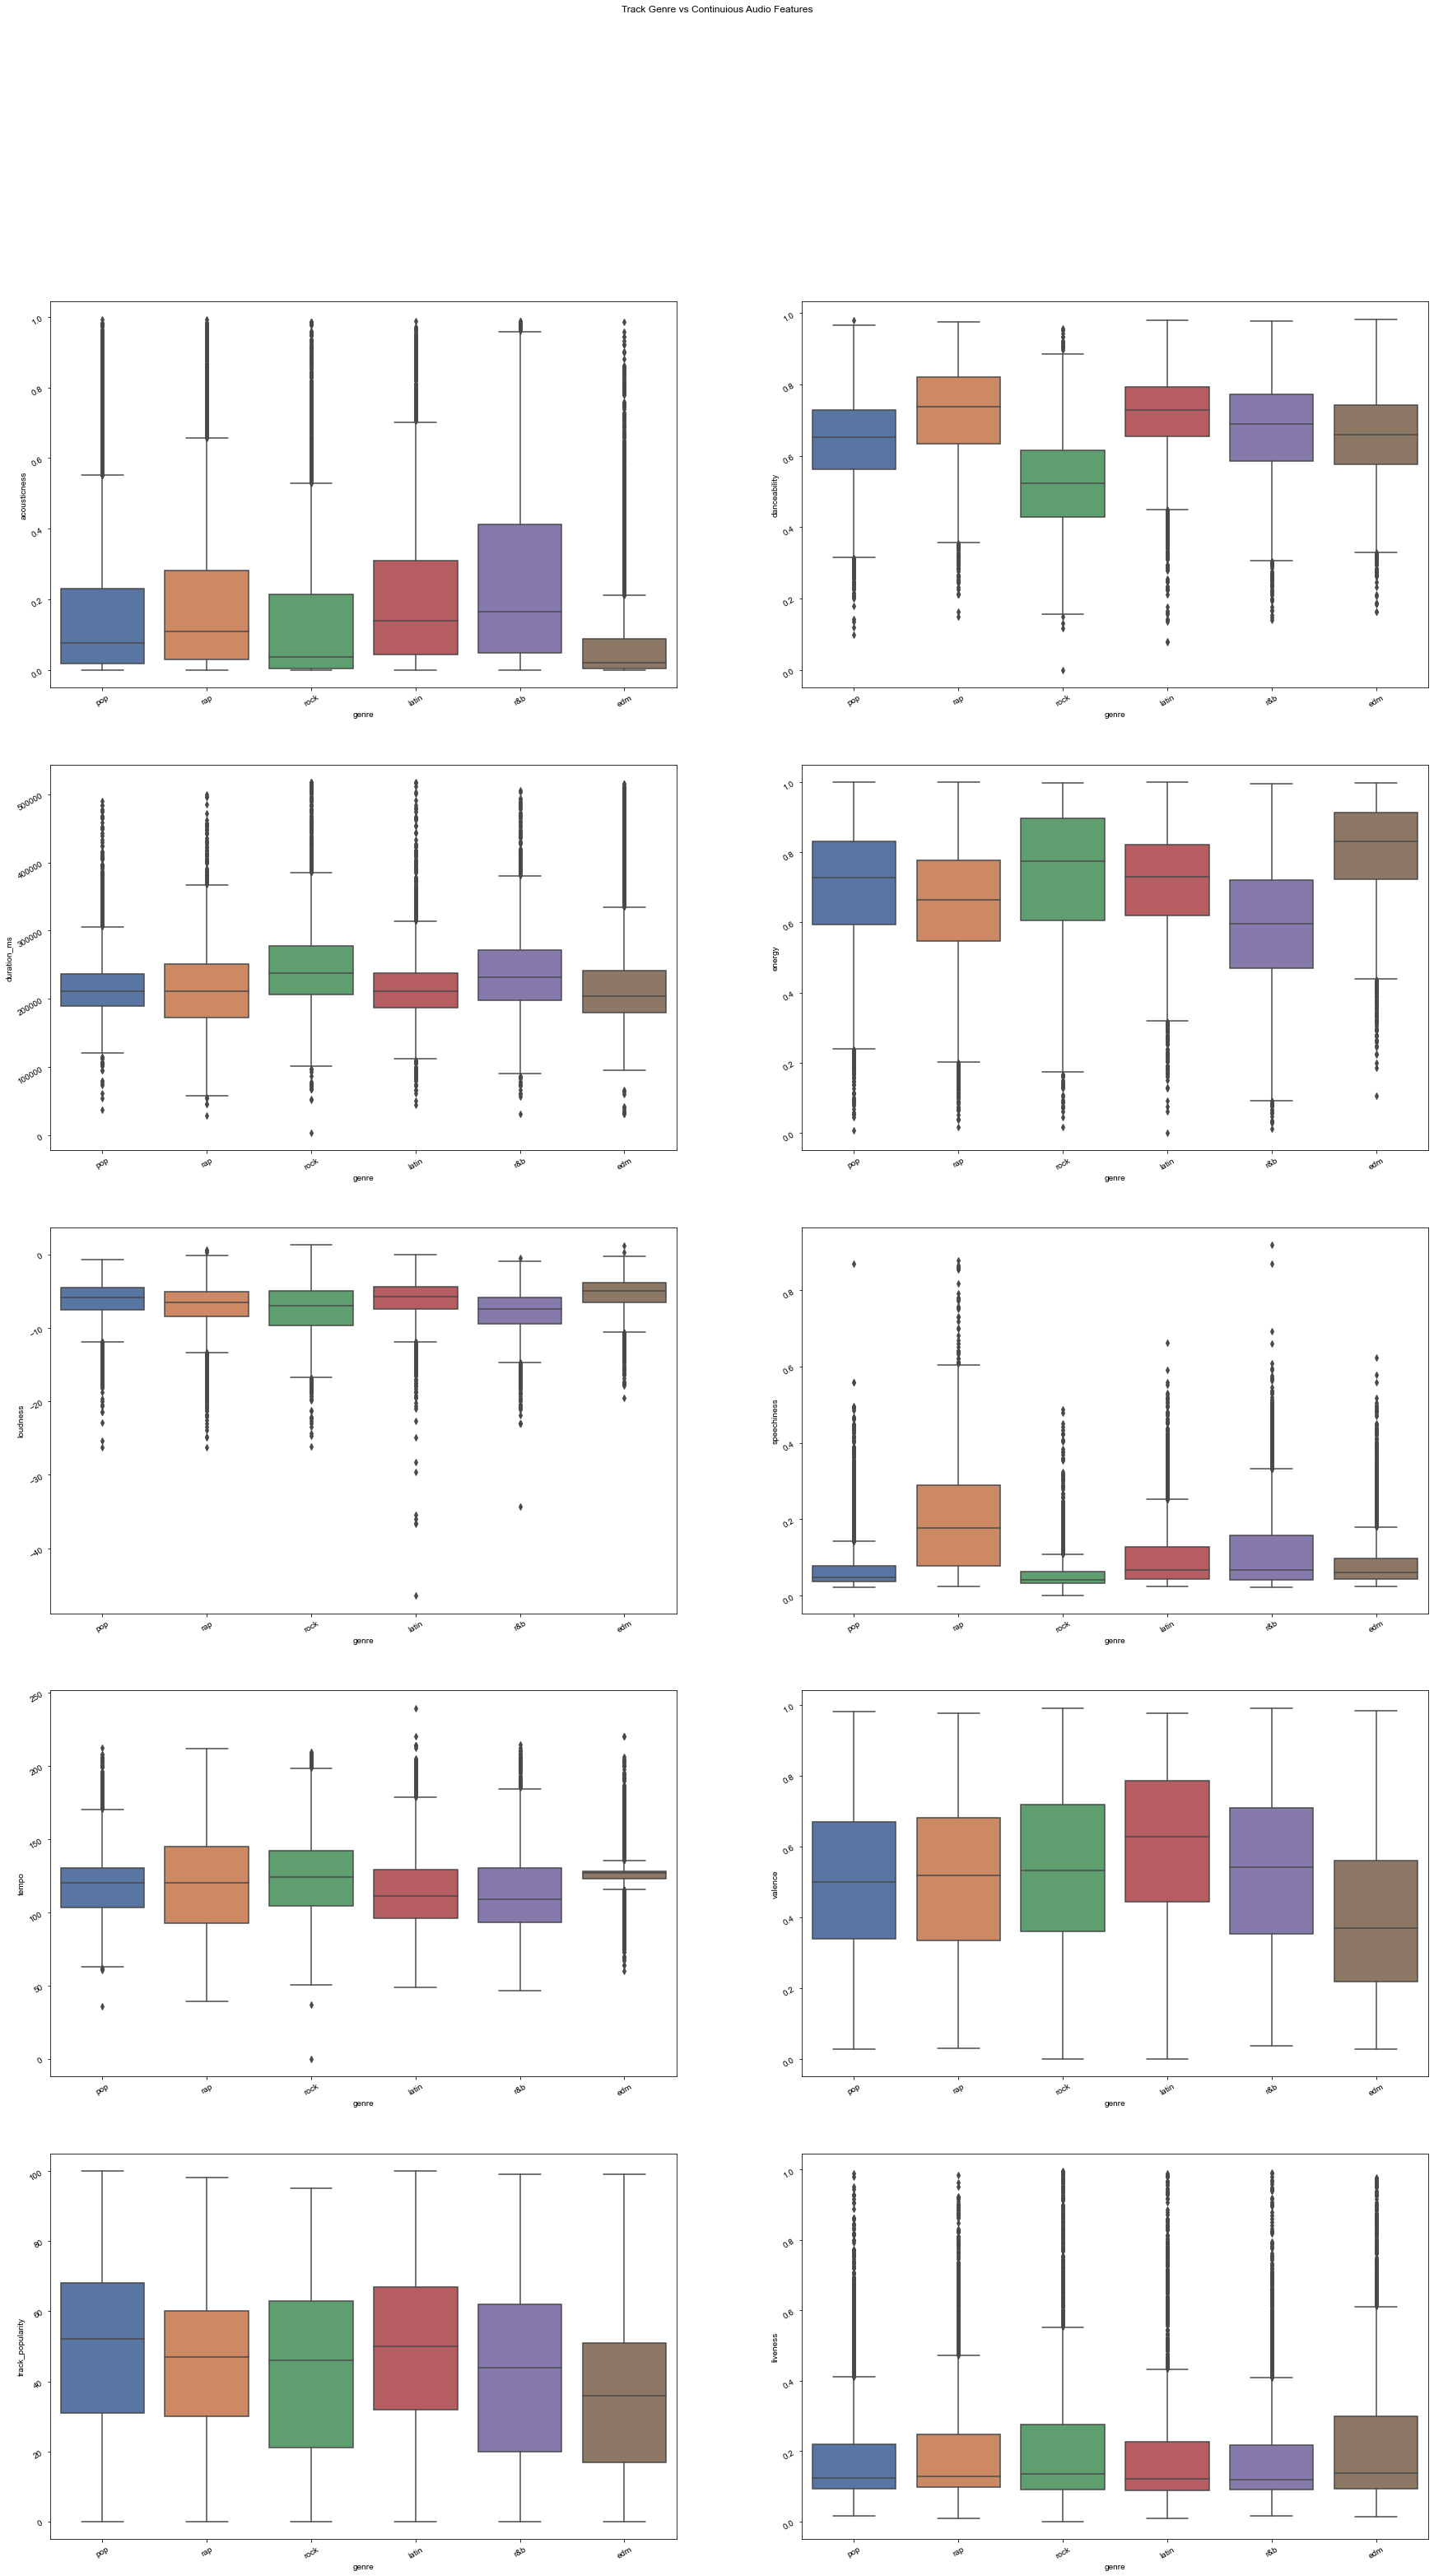

In [16]:
#How the Audio Features differ among the differnt root genres
fig, axes = plt.subplots(5,2,figsize=(30, 50))
fig.suptitle("Track Genre vs Continuious Audio Features")

sns.set(font_scale = 1.25)
#acousticness
plt1 = sns.boxplot(ax = axes[0,0],data = songs_data, x = "genre", y = 'acousticness')

#danceability
plt2 = sns.boxplot(ax = axes[0,1],data = songs_data, x = "genre", y = 'danceability')

#duration_ms
plt3 = sns.boxplot(ax = axes[1,0],data = songs_data, x = "genre", y = 'duration_ms')

#energy
plt4 = sns.boxplot(ax = axes[1,1],data = songs_data, x = "genre", y = 'energy')

#loudness
plt5 = sns.boxplot(ax = axes[2,0],data = songs_data, x = "genre", y = 'loudness')

#speechiness
plt6 = sns.boxplot(ax = axes[2,1],data = songs_data, x = "genre", y = 'speechiness')

#tempo
plt7 = sns.boxplot(ax = axes[3,0],data = songs_data, x = "genre", y = 'tempo')

#valence
plt8 = sns.boxplot(ax = axes[3,1],data = songs_data, x = "genre", y = 'valence')

#popularity
plt9 = sns.boxplot(ax = axes[4,0],data = songs_data, x = "genre", y = 'track_popularity')

#liveness
plt10 = sns.boxplot(ax = axes[4,1],data = songs_data, x = "genre", y = 'liveness')

for ax in fig.axes:
    ax.tick_params(labelrotation=30)

In [17]:
calc_outliers(songs_data.duration_ms)

upper quartile: 253585.0 
lower quartile: 187819.0
Lower Bound of outliers: 89170.0 
Upper Bound of outliers: 352234.0


(89170.0, 352234.0)

# Feature engineering
#### Identify columns with lots of categories and drop missing data

In [18]:
identify_number_categories(songs_data)

categorical_feature  number_categories
0            track_id              28356
1          track_name              23450
2        track_artist              10693
4         playlist_id                471
3       playlist_name                449
5               genre                  6

In [19]:
# remove columns who we beleive have no effect on the model

unused_col = ['track_id', 'track_name', 'playlist_id', 'playlist_name']

songs_data = songs_data.drop(columns=unused_col).reset_index(drop=True)

In [20]:
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_artist      32828 non-null  object 
 1   track_popularity  32833 non-null  int64  
 2   genre             32833 non-null  object 
 3   danceability      32833 non-null  float64
 4   energy            32833 non-null  float64
 5   key               32833 non-null  int64  
 6   loudness          32833 non-null  float64
 7   mode              32833 non-null  int64  
 8   speechiness       32833 non-null  float64
 9   acousticness      32833 non-null  float64
 10  instrumentalness  32833 non-null  float64
 11  liveness          32833 non-null  float64
 12  valence           32833 non-null  float64
 13  tempo             32833 non-null  float64
 14  duration_ms       32833 non-null  int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 3.8+ MB


In [21]:
songs_data.isnull().sum()

track_artist        5
track_popularity    0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

In [22]:
identify_missing_data(songs_data)

feature  percent_missing data_type
0       track_artist             0.02    object
1   track_popularity             0.00     int64
2              genre             0.00    object
3       danceability             0.00   float64
4             energy             0.00   float64
5                key             0.00     int64
6           loudness             0.00   float64
7               mode             0.00     int64
8        speechiness             0.00   float64
9       acousticness             0.00   float64
10  instrumentalness             0.00   float64
11          liveness             0.00   float64
12           valence             0.00   float64
13             tempo             0.00   float64
14       duration_ms             0.00     int64

In [23]:
# store it in variable so that we can filter for percent_missing greater that 0

missing_value_df = identify_missing_data(songs_data)
missing_value_df[missing_value_df["percent_missing"] > 0]

feature  percent_missing data_type
0  track_artist             0.02    object

In [24]:
# check the number of rows we need to drop

print("# of rows where data is missing:",
      songs_data[songs_data['track_artist'].isnull()].shape[0])

# of rows where data is missing: 5


In [25]:
# identify rows where track_artist has missing data, and remove these rows

# data where date_joined is missing
songs_data[songs_data['track_artist'].isnull()]

track_artist  track_popularity  genre  danceability  energy  key  \
8151           NaN                 0    rap         0.714   0.821    6   
9282           NaN                 0    rap         0.678   0.659   11   
9283           NaN                 0    rap         0.465   0.820   10   
19568          NaN                 0  latin         0.675   0.919   11   
19811          NaN                 0  latin         0.714   0.821    6   

       loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
8151     -7.635     1       0.1760        0.0410           0.00000    0.1160   
9282     -5.364     0       0.3190        0.0534           0.00000    0.5530   
9283     -5.907     0       0.3070        0.0963           0.00000    0.0888   
19568    -6.075     0       0.0366        0.0606           0.00653    0.1030   
19811    -7.635     1       0.1760        0.0410           0.00000    0.1160   

       valence    tempo  duration_ms  
8151     0.649   95.999       282707  
9282     0.191  146.153       202235  
9283     0.505   86.839       206465  
19568    0.726   97.017       252773  
19811    0.649   95.999       282707

In [26]:
# drop rows where track_artist is missing
# the tilda sign means identify rows where track_artist is not null

songs_data_cleaned = songs_data[~songs_data['track_artist'].isnull()]
songs_data_cleaned.head()

track_artist  track_popularity genre  danceability  energy  key  \
0        Ed Sheeran                66   pop         0.748   0.916    6   
1          Maroon 5                67   pop         0.726   0.815   11   
2      Zara Larsson                70   pop         0.675   0.931    1   
3  The Chainsmokers                60   pop         0.718   0.930    7   
4     Lewis Capaldi                69   pop         0.650   0.833    1   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -2.634     1       0.0583        0.1020          0.000000    0.0653   
1    -4.969     1       0.0373        0.0724          0.004210    0.3570   
2    -3.432     0       0.0742        0.0794          0.000023    0.1100   
3    -3.778     1       0.1020        0.0287          0.000009    0.2040   
4    -4.672     1       0.0359        0.0803          0.000000    0.0833   

   valence    tempo  duration_ms  
0    0.518  122.036       194754  
1    0.693   99.972       162600  
2    0.613  124.008       176616  
3    0.277  121.956       169093  
4    0.725  123.976       189052

In [27]:
# track_artist has now disapeared

missing_value_df = identify_missing_data(songs_data_cleaned)
missing_value_df[missing_value_df["percent_missing"] > 0]

Empty DataFrame
Columns: [feature, percent_missing, data_type]
Index: []

In [28]:
# drop feature loudness as it is highly correlated with energy and energy is more important to genre

songs_data_cleaned = songs_data_cleaned.drop(['loudness'], axis=1)

In [29]:
# drop feature track_Artist for now as we haven't found a way to encode it yet 

songs_data_cleaned = songs_data_cleaned.drop(['track_artist'], axis=1)

In [30]:
songs_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32828 entries, 0 to 32832
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  32828 non-null  int64  
 1   genre             32828 non-null  object 
 2   danceability      32828 non-null  float64
 3   energy            32828 non-null  float64
 4   key               32828 non-null  int64  
 5   mode              32828 non-null  int64  
 6   speechiness       32828 non-null  float64
 7   acousticness      32828 non-null  float64
 8   instrumentalness  32828 non-null  float64
 9   liveness          32828 non-null  float64
 10  valence           32828 non-null  float64
 11  tempo             32828 non-null  float64
 12  duration_ms       32828 non-null  int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 3.5+ MB


## encode target as it is of type object

In [31]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
songs_data_cleaned['genre_encoded'] = label_encoder.fit_transform(songs_data_cleaned['genre'])
  
songs_data_cleaned['genre_encoded'].unique()

array([2, 4, 5, 1, 3, 0])

In [32]:
songs_data_cleaned = songs_data_cleaned.drop(['genre'], axis=1)

In [33]:
songs_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32828 entries, 0 to 32832
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  32828 non-null  int64  
 1   danceability      32828 non-null  float64
 2   energy            32828 non-null  float64
 3   key               32828 non-null  int64  
 4   mode              32828 non-null  int64  
 5   speechiness       32828 non-null  float64
 6   acousticness      32828 non-null  float64
 7   instrumentalness  32828 non-null  float64
 8   liveness          32828 non-null  float64
 9   valence           32828 non-null  float64
 10  tempo             32828 non-null  float64
 11  duration_ms       32828 non-null  int64  
 12  genre_encoded     32828 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 3.5 MB


In [34]:
# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split

# define the target and features

target = songs_data_cleaned["genre_encoded"]
features = songs_data_cleaned.drop(["genre_encoded"], axis = 1)

In [35]:
target.shape

(32828,)

In [36]:
features.shape

(32828, 12)

In [37]:
# split the data into train and test set
# because the dataset is imbalanced we can use stratify

X_train, X_test, y_train, y_test = train_test_split(
                                                features, 
                                                target,
                                                test_size = 0.2, 
                                                random_state = 8888)

In [38]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale train_features and set the values to a new variable
scaler = StandardScaler()

# Scale train_features and test_features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
X_test_scaled[1]

array([-0.18431326,  0.39434797,  1.40606038, -1.21023677,  0.88003378,
       -0.0106909 , -0.78948156, -0.37838212, -0.09645784,  0.17732419,
       -0.68086399, -0.1429576 ])

# PCA - no need to do it

# end PCA

## Build and evaluate the Decision Tree


In [41]:
# ... YOUR CODE ...
from sklearn.tree import DecisionTreeClassifier

# Train our decision tree
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_dt = dt.predict(X_test)

In [42]:
print("first five predicted values:", y_pred_dt[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [4 3 5 0 0]
first five actual values: [0, 5, 2, 0, 2]


In [43]:
print("accuracy:", round(accuracy_score(y_test, y_pred_dt)), 2)
print("recall:", round(recall_score(y_test, y_pred_dt, average='macro'), 2))
print("precision:", round(precision_score(y_test, y_pred_dt, average='macro'), 2))
print("f1-score:", round(f1_score(y_test, y_pred_dt, average='macro'), 2))

accuracy: 0 2
recall: 0.43
precision: 0.43
f1-score: 0.43


In [44]:
# A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known

confusion_matrix(y_test, y_pred_dt)

array([[742, 141, 170,  58,  77,  58],
       [127, 381, 148, 141, 143,  50],
       [207, 194, 272, 187,  85, 173],
       [ 84, 163, 175, 369, 175,  92],
       [104, 202,  96, 203, 521,  38],
       [ 82,  72, 158,  95,  51, 532]])

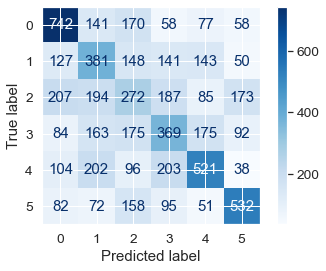

In [45]:
# can easily see where the model has incorrectly classified the data

plot_confusion_matrix(dt, 
                      X_test, 
                      y_test,
                      cmap = plt.cm.Blues);

In [46]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.55      0.60      0.57      1246
           1       0.33      0.38      0.36       990
           2       0.27      0.24      0.25      1118
           3       0.35      0.35      0.35      1058
           4       0.50      0.45      0.47      1164
           5       0.56      0.54      0.55       990

    accuracy                           0.43      6566
   macro avg       0.43      0.43      0.43      6566
weighted avg       0.43      0.43      0.43      6566



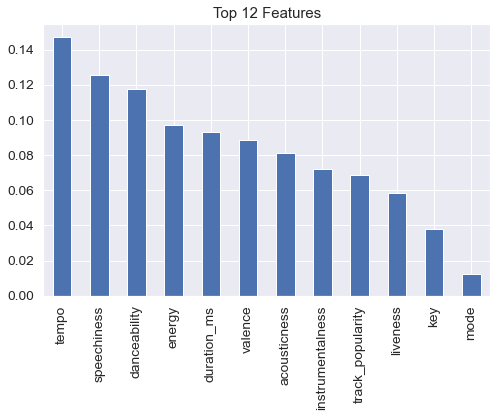

In [47]:
# feature importance plot

feature_importance_plot(dt, X_train, n = 12)


In [48]:
# check for signs of overfitting

y_pred_train_dt = dt.predict(X_train)

print("accuracy:", round(accuracy_score(y_train, y_pred_train_dt), 2))
print("recall:", round(recall_score(y_train, y_pred_train_dt, average='macro'), 2))
print("precision:", round(precision_score(y_train, y_pred_train_dt, average='macro'), 2))
print("f1-score:", round(f1_score(y_train, y_pred_train_dt, average='macro'), 2))

# high accuracy on training set, signs of variance between test and training set.

accuracy: 0.94
recall: 0.94
precision: 0.95
f1-score: 0.94


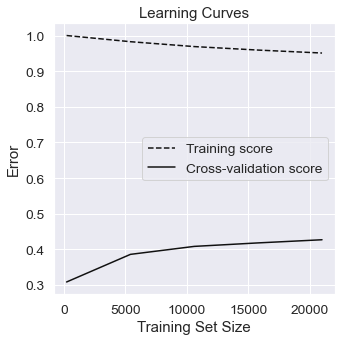

In [49]:
learning_curve_plot(dt, X_train, y_train, scoring = 'accuracy')

# gap between the learning curve also shows signs of overfitting

## Build and evaluate the Random Forest

In [50]:
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [51]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([2, 1, 5, ..., 5, 0, 4])

In [52]:
print("first five predicted values:", y_pred_rf[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [2 1 5 0 0]
first five actual values: [0, 5, 2, 0, 2]


In [86]:
print("accuracy:", round(accuracy_score(y_test, y_pred_rf), 2))
print("recall:", round(recall_score(y_test, y_pred_rf, average='macro'), 2))
print("precision:", round(precision_score(y_test, y_pred_rf, average='macro'), 2))
print("f1-score:", round(f1_score(y_test, y_pred_rf, average='macro'), 2))


# Improvement in accuracy compared to Logistic Regression
# There still signs of overfitting as accuracy scores are much better on the train set
# Feature importance plot shows that tempo is the most important feature, however with random forest model the features have lower scores than with XGBoost
# gap between the learning curve also shows signs of overfitting and high variance

accuracy: 0.55
recall: 0.55
precision: 0.54
f1-score: 0.54


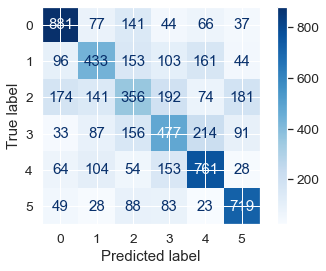

In [54]:
# plot confusion matrix

plot_confusion_matrix(rf, X_test, y_test, cmap = plt.cm.Blues);

In [55]:
# print classification report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1246
           1       0.50      0.44      0.47       990
           2       0.38      0.32      0.34      1118
           3       0.45      0.45      0.45      1058
           4       0.59      0.65      0.62      1164
           5       0.65      0.73      0.69       990

    accuracy                           0.55      6566
   macro avg       0.54      0.55      0.54      6566
weighted avg       0.54      0.55      0.55      6566



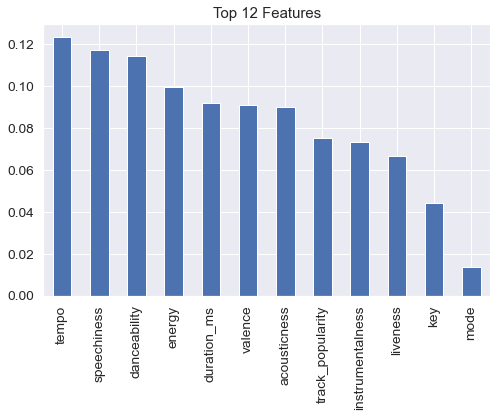

In [56]:
# feature importance plot

feature_importance_plot(rf, X_train, n = 12) 

In [57]:
# performance on training data

y_pred_train_rf =rf.predict(X_train)

print("accuracy:", round(accuracy_score(y_train, y_pred_train_rf), 2))
print("recall:", round(recall_score(y_train, y_pred_train_rf, average='macro'), 2))
print("precision:", round(precision_score(y_train, y_pred_train_rf, average='macro'), 2))
print("f1-score:", round(f1_score(y_train, y_pred_train_rf, average='macro'), 2))

accuracy: 0.94
recall: 0.94
precision: 0.94
f1-score: 0.94


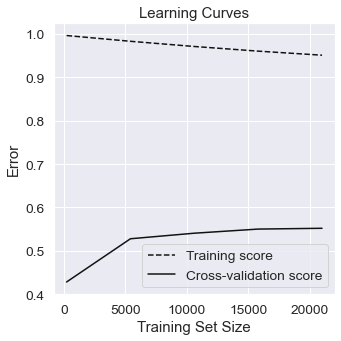

In [68]:
learning_curve_plot(rf, X_train, y_train, scoring = 'accuracy')

# signs of overfitting, similar to decision tree

## Build and Evaluate the XGBoost Model

In [59]:
# fit the XGBoost model to training data

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:58:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [60]:
# make predictions on the test set

y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([2, 1, 2, ..., 5, 0, 4])

In [61]:

print("first five predicted values:", y_pred_xgb[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [2 1 2 0 4]
first five actual values: [0, 5, 2, 0, 2]


In [62]:
# evaluation metrics comparing predictions and actual values

print("accuracy:", round(accuracy_score(y_test, y_pred_xgb), 2))
print("recall:", round(recall_score(y_test, y_pred_xgb, average='macro'), 2))
print("precision:", round(precision_score(y_test, y_pred_xgb, average='macro'), 2))
print("f1-score:", round(f1_score(y_test, y_pred_xgb, average='macro'), 2))

# Random Forest has same recall than the XGBoost model

accuracy: 0.56
recall: 0.55
precision: 0.55
f1-score: 0.55


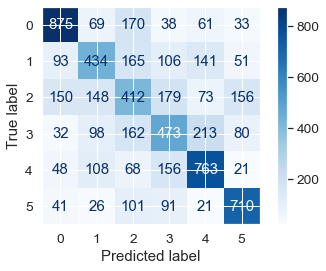

In [63]:
# confusion matrix

plot_confusion_matrix(xgb, X_test, y_test, cmap = plt.cm.Blues);

In [64]:
# classification report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1246
           1       0.50      0.44      0.47       990
           2       0.38      0.32      0.34      1118
           3       0.45      0.45      0.45      1058
           4       0.59      0.65      0.62      1164
           5       0.65      0.73      0.69       990

    accuracy                           0.55      6566
   macro avg       0.54      0.55      0.54      6566
weighted avg       0.54      0.55      0.55      6566



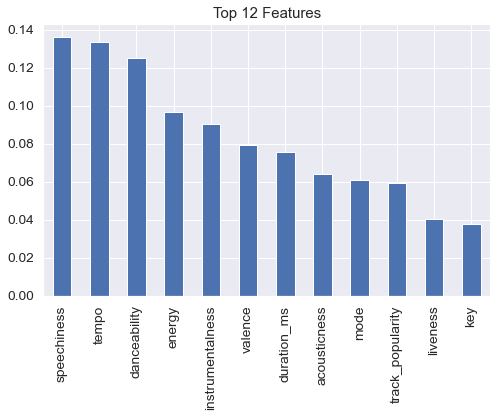

In [65]:
# We see improvements in accuracy and precision
# The feature importance plot shows that speechiness appears to be the most important feature for this model.
# We can also see that with the random forest model the features have higher scores than previous models.
# Although there are still signs of overfitting, it is much less than with the Random Forest and Logistic Regression models. Furthermore this could be reduced with more tuning and more data


feature_importance_plot(xgb, X_train, n = 12) 

In [66]:
y_pred_train_xgb =xgb.predict(X_train)

print("accuracy:", round(accuracy_score(y_train, y_pred_train_xgb), 2))
print("recall:", round(recall_score(y_train, y_pred_train_xgb, average='macro'), 2))
print("precision:", round(precision_score(y_train, y_pred_train_xgb, average='macro'), 2))
print("f1-score:", round(f1_score(y_train, y_pred_train_xgb, average='macro'), 2))

# signs of overfitting but less than Random Forest and Decision Tree

accuracy: 0.79
recall: 0.79
precision: 0.79
f1-score: 0.79


/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/xgbo

/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/tiagoclarenc/anaconda3/lib/python3.9/site-packages/xgbo

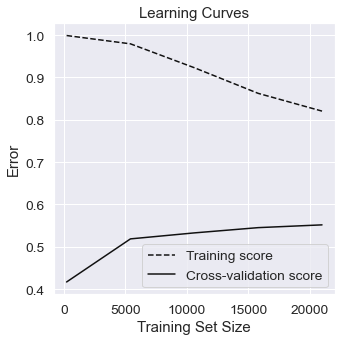

[16:02:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:03:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:03:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:04:18] WARNING: /Users/runner/miniforge3/c

In [67]:
learning_curve_plot(xgb, X_train, y_train, scoring = 'accuracy')


## Build and Evaluate the Logistic Regression Model

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
# Import the Linear Regression model from sklearn and call it lr

log_reg = LogisticRegression()

log_reg

LogisticRegression()

In [77]:
# Fit the model on the "training data"

log_reg.fit(X_train_scaled, y_train) 

# OUR MACHINE LEARNING MODEL

LogisticRegression()

In [78]:
# Evaluate how well the model predicts on unseen data aka "test data"

y_pred_lr = log_reg.predict(X_test_scaled) 
y_pred_lr

array([2, 0, 5, ..., 3, 1, 4])

In [79]:
# compare the first five predictions with the actual values

print("first five predicted total amounts:", y_pred_lr[0:5])
print("first five actual total amounts:", list(y_test[0:5]))

first five predicted total amounts: [2 0 5 0 4]
first five actual total amounts: [0, 5, 2, 0, 2]


In [80]:
# evaluation metrics comparing predictions and actual values

print("accuracy:", round(accuracy_score(y_test, y_pred_lr), 2))
print("recall:", round(recall_score(y_test, y_pred_lr, average='macro'), 2))
print("precision:", round(precision_score(y_test, y_pred_lr, average='macro'), 2))
print("f1-score:", round(f1_score(y_test, y_pred_lr, average='macro'), 2))

# Random Forest has same recall than the XGBoost model

accuracy: 0.45
recall: 0.45
precision: 0.44
f1-score: 0.44


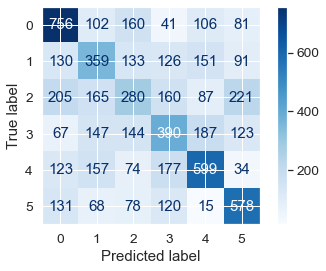

In [82]:
plot_confusion_matrix(log_reg, X_test_scaled, y_test, cmap = plt.cm.Blues);

In [83]:
# classification report

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.54      0.61      0.57      1246
           1       0.36      0.36      0.36       990
           2       0.32      0.25      0.28      1118
           3       0.38      0.37      0.38      1058
           4       0.52      0.51      0.52      1164
           5       0.51      0.58      0.55       990

    accuracy                           0.45      6566
   macro avg       0.44      0.45      0.44      6566
weighted avg       0.44      0.45      0.45      6566



# To be done: Improvements to the model
